# Dividir el dataset en conjunto de entrenamiento y de testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/Users/Luis Antonio Garza/Python proyectos/python-ml-course-master/datasets/ads/Advertising.csv")

In [3]:
a = np.random.randn(len(data))

(array([ 2.,  2., 13., 22., 56., 55., 27., 14.,  6.,  3.]),
 array([-2.91910280e+00, -2.33524557e+00, -1.75138833e+00, -1.16753109e+00,
        -5.83673857e-01,  1.83379723e-04,  5.84040617e-01,  1.16789785e+00,
         1.75175509e+00,  2.33561233e+00,  2.91946956e+00]),
 <BarContainer object of 10 artists>)

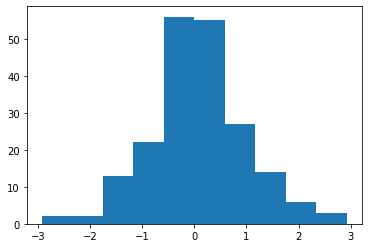

In [4]:
plt.hist(a)

In [5]:
check = (a<0.8) # 80 / 20
training = data[check]
testing = data[~check]

In [6]:
len(training), len(testing)

(164, 36)

In [10]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = "Sales~TV +Radio", data = training).fit()

In [11]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     817.9
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           4.60e-85
Time:                        01:29:09   Log-Likelihood:                -308.37
No. Observations:                 164   AIC:                             622.7
Df Residuals:                     161   BIC:                             632.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9384      0.307      9.576      0.000       2.332       3.544
TV             0.0455      0.001     31.132      0.000       0.043       0.048
Radio          0.1920      0.008     22.669      0.000       0.175       0.209
==============================================================================
Omnibus:                       18.566   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.282
Skew:                          -0.858   Prob(JB):                     2.39e-05
Kurtosis:                       3.414   Cond. No.                         421.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 2.9384	+ 0.0455*TV + 0.1920*Radio

## Validación del modelo con el conjunto de testing

In [12]:
sales_pred = lm.predict(testing)
sales_pred

1      12.507562
6      11.851254
7      12.170095
8       3.732820
30     21.698079
32      7.648934
35     16.952299
38     10.025036
48     16.309103
60      5.756571
62     16.802062
68     19.019255
84     20.907344
95     16.434786
97     15.382700
106     6.187554
110    14.786429
116    12.017151
120    14.512329
122    13.591102
124    19.581262
130    10.572254
136    11.590021
141    18.547471
144    10.156638
145     9.686770
148    12.403782
157    10.003838
160    14.261787
167    13.346019
176    20.038074
179    12.392878
185    20.923732
186     9.688764
190    12.625608
199    15.149867
dtype: float64

In [13]:
SSD = sum((testing["Sales"] - sales_pred)**2)
SSD

146.045662970612

In [14]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

2.1037172221153217

In [15]:
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error

0.15950678179475902